# PCA Demonstration
This PCA demonstration uses sci-kit learn PCA. Input features are centered but not scaled before finding the eigenvectors. Place training images in the "./spiraldata" folder (or update this variable in the code). When images show up from opencv make sure to hit a key to make them go away. DO NOT close the window or the kernel will crash.

References:  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html  
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60  
https://www.youtube.com/watch?v=ey2PE5xi9-A#t=2385  

In [1]:
import numpy as np
import cv2 as cv

In [2]:
# Parameters to be used everywhere
shape = (400,300,3)
resize = (300,400) # for some reason this is backward in opencv


In [3]:
def vec_to_image(vec, shape):
    vec = vec.astype(np.uint8) 
    vec = vec.reshape(shape)
    vec[vec<0] = 0
    vec[vec>255] = 255
    return vec

In [4]:
# Import and flatten our images
import os
# Eraser data
data_dir = "./spiraldata"
files = os.listdir(data_dir)
# Assume sequential naming
fuzz = 10 # Avoid over-reliance on temporal similarity
files.sort()
files = files[::fuzz]
data = []
names = []
for file in files:
    relative_path = os.path.join(data_dir, file)
    img = cv.imread(relative_path)
    if img is None:
        print(f"Invalid image file: {file}")
        continue
    img = cv.resize(img, (300,400))
    img_vec = img.flatten()
    data.append(img_vec)
    names.append(file)

Invalid image file: spiral.mp4


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
# Scale our data - this is not necessary for image data
# scaler = StandardScaler()
# scaler.fit(data)
# data = scaler.transform(data)

In [7]:
# This will take a long time for larger datasets
# e.g. 1-2 minutes for 500 images
pca = PCA(n_components=2)
pca.fit(data)
print(pca.explained_variance_ratio_)

[0.17754167 0.12395602]


In [8]:
# Get the pca of the input data
output = pca.transform(data)

In [9]:
import matplotlib.pyplot as plt

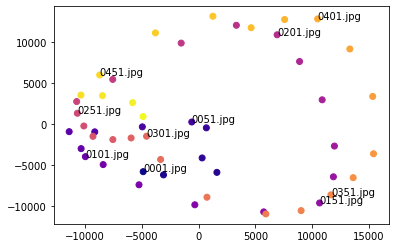

In [10]:
# Graphing the reduced components
fig = plt.figure()
ax = plt.axes()
t=np.linspace(0, 255, num=output.shape[0])
ax.scatter(output[:,0], output[:,1], c=t, cmap='plasma')
label_frac = 5 # label one in 5 of the images
for i in range(0,len(output),label_frac):
    ax.annotate(names[i],output[i])

In [11]:
# Graph the image of the first eigenvector
# eigenvector = pca.components_[0]
# eigenimage = eigenvector*np.linalg.norm(data[0])+pca.mean_
# cv.imshow("First eigenvector", vec_to_image(eigenimage, shape))
# cv.waitKey(0)
# cv.destroyAllWindows()

In [12]:
# Reconstruct our data[0] using the components found from pca
# num_to_retain = 50 # make sure this is actually less than number of components
# recover = np.matmul(output[:,:num_to_retain],pca.components_[:num_to_retain])+pca.mean_

# cv.imshow("Reconstruction", vec_to_image(recover[0], shape))
# cv.waitKey(0)
# cv.destroyAllWindows()